In [2]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure

# Data manipulation

## Urban anamolies (Dans Ma Rue)

In [3]:
df_2012 = pd.read_csv("data/DMR_2012.csv", delimiter=";")
df_2013 = pd.read_csv("data/DMR_2013.csv", delimiter=";")
df_2014 = pd.read_csv("data/DMR_2014.csv", delimiter=";")
df_2015 = pd.read_csv("data/DMR_2015.csv", delimiter=";")
df_2016 = pd.read_csv("data/DMR_2016.csv", delimiter=";")
df_2017 = pd.read_csv("data/DMR_2017.csv", delimiter=";")
df_2018 = pd.read_csv("data/DMR_2018.csv", delimiter=";")
df_2019 = pd.read_csv("data/DMR_2019.csv", delimiter=";")
df_2020 = pd.read_csv("data/DMR_2020.csv", delimiter=";")
df_2021 = pd.read_csv("data/DMR_2021.csv", delimiter=";")
df_2022 = pd.read_csv("data/DMR_2022.csv", delimiter=";", encoding='ISO-8859-1')

At first removing the discrepencies among datasets <br>
Data from 2012 and 2020 has same column name and ordering <br>
Therefore rearranging the column names of 2021 dataset <br>
Dropping the 'ETAT' and 'DATEETAT' column in 2021 dataset because not needed <br>
Dropping the 'etat' and 'dateetat' column in 2022 dataset because not needed

In [4]:
df_2021.drop(columns=['ETAT', 'DATEETAT'], inplace=True)
df_2022.drop(columns=['etat', 'dateetat'], inplace=True)

Making the column name of 2021 dataset same as the column names of 2012 to 2020 datasets

In [5]:
column_names_2021 = {'OID_': 'OBJECTID'}
df_2021.rename(columns=column_names_2021, inplace=True)

Rearranging the column order of 2021 dataset to remove discrepency 

In [6]:
column_order_2021 = ['OBJECTID', 'ID_DMR', 'TYPE', 'SOUSTYPE', 'ADRESSE', 'CODE_POSTAL', 'VILLE', 'ARRONDISSEMENT', 'DATEDECL', 'ANNEEDECL',
                      'MOISDECL', 'NUMERO', 'PREFIXE', 'INTERVENANT', 'CONSEILQUARTIER', 'X', 'Y']

df_2021 = df_2021[column_order_2021]

Renaming the columns of 2022 dataset

In [7]:
column_names_2022 = {'id_dmr' : 'ID_DMR', 
                     'type' : 'TYPE', 
                     'soustype' : 'SOUSTYPE', 
                     'adresse' : 'ADRESSE', 
                     'code_postal' : 'CODE_POSTAL', 
                     'ville' : 'VILLE',
                     'arrondissement': 'ARRONDISSEMENT', 
                     'datedecl': 'DATEDECL', 
                     'anneedecl' : 'ANNEEDECL', 
                     'moisdecl' : 'MOISDECL', 
                     'numero': 'NUMERO', 
                     'prefixe' : 'PREFIXE', 
                     'intervenant': 'INTERVENANT', 
                     'conseilquartier' : 'CONSEILQUARTIER'
                     }
df_2022.rename(columns=column_names_2022, inplace=True)

Rearrangingg the 2022 dataset column order <br>
The 2022 dataset has one column missing, that is 'OBJECTID' <br>
But not really useful column in our analysis. We can drop the aforementioned <br>
column in other dataframes

In [8]:
column_order_2022 = ['ID_DMR', 'TYPE', 'SOUSTYPE', 'ADRESSE', 'CODE_POSTAL', 'VILLE', 'ARRONDISSEMENT', 'DATEDECL', 'ANNEEDECL',
                      'MOISDECL', 'NUMERO', 'PREFIXE', 'INTERVENANT', 'CONSEILQUARTIER', 'X', 'Y']
df_2022 = df_2022[column_order_2022]

Concatenating the dataframes from 2012 to 2021 and dropping the 'OBJECTID' column

In [9]:
df_2012_to_2021 = pd.concat([df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020, df_2021], ignore_index=True)
df_2012_to_2021.drop(columns='OBJECTID', inplace=True)
df_2012_to_2021.tail()

,ID_DMR,TYPE,SOUSTYPE,ADRESSE,CODE_POSTAL,VILLE,ARRONDISSEMENT,DATEDECL,ANNEEDECL,MOISDECL,NUMERO,PREFIXE,INTERVENANT,CONSEILQUARTIER,X,Y
2555344,A2021L065595,Propreté,Déchets et/ou salissures divers,"6 Rue Gobert, 75011 PARIS","75011,000000000000000",Paris 11,"11,000000000000000",31/12/2021 00:00:00,2021,12,"65595,000000000000000",A,DPE-STPP-DT,LEON BLUM - FOLIE-REGNAULT,"2,382560494240973","48,855614003847002"
2555345,S2021L065596,"Arbres, végétaux et animaux",Présence de rats,"1 rue de la Cité, 75004 PARIS","75001,000000000000000",Paris 1,"1,000000000000000",31/12/2021 00:00:00,2021,12,"65596,000000000000000",S,DASES,SEINE,"2,348341505072298","48,855422999697332"
2555346,G2021L065598,Éclairage / Électricité,Éclairage public éteint la nuit,"40 Rue des Blancs Manteaux, 75004 PARIS","75001,000000000000000",Paris 1,"1,000000000000000",31/12/2021 00:00:00,2021,12,"65598,000000000000000",G,Prestataire de la DVD opérant sur tout Paris (...,MARAIS - ARCHIVES,"2,355188099336036","48,859843998847460"
2555347,S2021L065599,Propreté,Déjections canines,"15 rue Severo, 75014 PARIS","75014,000000000000000",Paris 14,"14,000000000000000",31/12/2021 00:00:00,2021,12,"65599,000000000000000",S,DPE-STPP-DT,PERNETY,"2,322815199002224","48,832526995540391"
2555348,G2021L065600,"Autos, motos, vélos...",Automobile ou autre véhicule motorisé en stati...,"7 Rue Labie, 75017 PARIS","75017,000000000000000",Paris 17,"17,000000000000000",31/12/2021 00:00:00,2021,12,"65600,000000000000000",G,DPMP-SCOP,TERNES - MAILLOT,"2,288641198892578","48,879432999256707"


Adding the 2022 dataset to the concatenated dataset hence getting the dataset from 2012 to 2022. Column ordering is uniform and column names are same across all the dataframes

In [10]:
df_2012_to_2022 = pd.concat([df_2012_to_2021, df_2022], ignore_index=True)

In [11]:
df_2012_to_2022.tail()

,ID_DMR,TYPE,SOUSTYPE,ADRESSE,CODE_POSTAL,VILLE,ARRONDISSEMENT,DATEDECL,ANNEEDECL,MOISDECL,NUMERO,PREFIXE,INTERVENANT,CONSEILQUARTIER,X,Y
3401583,A2022L059842,Objets abandonnés,Bac roulant à ordures ménagères,"5 Rue Saulnier, 75009 PARIS",75009,Paris 9,9,31/12/2022 00:00,2022,12,59842,A,DPE-STPP-DT,FAUBOURG MONTMARTRE,"2,3440077","48,8745232"
3401584,G2022L059843,"Autos, motos, vélos...",[] Automobile ou autre véhicule motorisé en st...,"25 Rue des Cévennes, 75015 PARIS",75015,Paris 15,15,31/12/2022 00:00,2022,12,59843,G,DPMP avec un découpage en circonscription,CITROEN - BOUCICAUT,"2,2778447","48,8437538"
3401585,G2022L059844,Objets abandonnés,Autres objets encombrants abandonnés,"118 Rue du Château des Rentiers, 75013 PARIS",75013,Paris 13,13,31/12/2022 00:00,2022,12,59844,G,Ramen en tant que prestataire de DansMaRue,MASSENA - JEANNE D'ARC,"2,3676229","48,8284187"
3401586,G2022L059845,"Autos, motos, vélos...",Automobile ou autre véhicule motorisé en stati...,"39 Rue Hallé, 75014 PARIS",75014,Paris 14,14,31/12/2022 00:00,2022,12,59845,G,DPMP-SCOP,MOUTON - DUVERNET,"2,3315785","48,8306465"
3401587,G2022L059846,Propreté,Propreté des équipements de collecte des déche...,"7 Cité des Écoles, 75020 PARIS",75020,Paris 20,20,31/12/2022 00:00,2022,12,59846,G,DPE-STPP-DT,GAMBETTA,"2,3948593","48,8662338"


Converting the 'CODE_POSTAL', 'ARR' and 'NUMERO' column to string so that we can replace the commas with dots using a user defined function

In [12]:
df_2012_to_2022['CODE_POSTAL'] = df_2012_to_2022['CODE_POSTAL'].astype(str)
df_2012_to_2022['ARRONDISSEMENT'] = df_2012_to_2022['ARRONDISSEMENT'].astype(str)
df_2012_to_2022['NUMERO'] = df_2012_to_2022['NUMERO'].astype(str)

def replace_comma_with_dot(a):
    return a.replace(',', '.')

df_2012_to_2022['CODE_POSTAL'] = df_2012_to_2022['CODE_POSTAL'].apply(lambda x: replace_comma_with_dot(x))
df_2012_to_2022['ARRONDISSEMENT'] = df_2012_to_2022['ARRONDISSEMENT'].apply(lambda x: replace_comma_with_dot(x))
df_2012_to_2022['NUMERO'] = df_2012_to_2022['NUMERO'].apply(lambda x: replace_comma_with_dot(x))
df_2012_to_2022['X'] = df_2012_to_2022['X'].apply(lambda x: replace_comma_with_dot(x))
df_2012_to_2022['Y'] = df_2012_to_2022['Y'].apply(lambda x: replace_comma_with_dot(x))


Then converting the 'CODE_POSTAL', 'ARR', 'NUMERO', 'X' and 'Y' column to float as an intermediate step to avoid parsing error

In [13]:
df_2012_to_2022['CODE_POSTAL'] = df_2012_to_2022['CODE_POSTAL'].astype(float)
df_2012_to_2022['ARRONDISSEMENT'] = df_2012_to_2022['ARRONDISSEMENT'].astype(float)
df_2012_to_2022['NUMERO'] = df_2012_to_2022['NUMERO'].astype(float)
df_2012_to_2022['X'] = df_2012_to_2022['X'].astype(float)
df_2012_to_2022['Y'] = df_2012_to_2022['Y'].astype(float)

Finally converting the 'CODE_POSTAL', 'ARR' and 'NUMERO' column back to int <br>
'X' and 'Y' columns are kept as float because they are coordinates

In [14]:
df_2012_to_2022['CODE_POSTAL'] = df_2012_to_2022['CODE_POSTAL'].astype(int)
df_2012_to_2022['ARRONDISSEMENT'] = df_2012_to_2022['ARRONDISSEMENT'].astype(int)
df_2012_to_2022['NUMERO'] = df_2012_to_2022['NUMERO'].astype(int)

Creating a random number to look at any random 5 rows of the merged dataframe

In [15]:
max_len = len(df_2012_to_2022) - 10
# max_len = 415480
import random
lim = random.randint(0,max_len)
print(lim)

df_2012_to_2022.iloc[lim:(lim+5)]

72509


,ID_DMR,TYPE,SOUSTYPE,ADRESSE,CODE_POSTAL,VILLE,ARRONDISSEMENT,DATEDECL,ANNEEDECL,MOISDECL,NUMERO,PREFIXE,INTERVENANT,CONSEILQUARTIER,X,Y
72509,S2014I000855,"Graffitis, tags, affiches et autocollants","Graffitis sur mur, façade sur rue, pont","7 rue dieu, 75010 PARIS",75010,Paris 10,10,2014-09-05,2014,9,855,S,graffitis,CHATEAU D'EAU - LANCRY,2.364325,48.870294
72510,S2014I000856,Objets abandonnés,Autres objets encombrants abandonnés,"1 cité bergère, 75009 PARIS",75009,Paris 9,9,2014-09-05,2014,9,856,S,Ramen en tant que prestataire de DansMaRue,FAUBOURG MONTMARTRE,2.343527,48.872007
72511,S2014I000857,Objets abandonnés,Autres objets encombrants abandonnés,"4 rue desgenettes, 75007 PARIS",75007,Paris 7,7,2014-09-05,2014,9,857,S,Ramen en tant que prestataire de DansMaRue,GROS CAILLOU,2.309595,48.861969
72512,S2014I000858,Du vert près de chez moi,Végétalisation d'un pied d'arbre,"place de la république de panama, 75015 PARIS",75015,Paris 15,15,2014-09-05,2014,9,858,S,NaN,CAMBRONNE - GARIBALDI,2.308716,48.846039
72513,S2014I000859,Propreté,Propreté des équipements de collecte des déche...,"rue du faubourg saint-antoine, 75011 PARIS",75011,Paris 11,11,2014-09-05,2014,9,859,S,DPE,BASTILLE - POPINCOURT,2.382271,48.850955


Renaming the 'X' and 'Y' columns to 'LONGITUDE' and 'LATITUDE' for kepler.gl website

In [16]:
df_2012_to_2022 = df_2012_to_2022.rename(columns={'X': 'LONGITUDE'})
df_2012_to_2022 = df_2012_to_2022.rename(columns={'Y': 'LATITUDE'})

Deleting an intermediate dataframe to save memory

In [17]:
del df_2012_to_2021

Working with the final dataframe 

In [18]:
df_2012_to_2022.tail()

,ID_DMR,TYPE,SOUSTYPE,ADRESSE,CODE_POSTAL,VILLE,ARRONDISSEMENT,DATEDECL,ANNEEDECL,MOISDECL,NUMERO,PREFIXE,INTERVENANT,CONSEILQUARTIER,LONGITUDE,LATITUDE
3401583,A2022L059842,Objets abandonnés,Bac roulant à ordures ménagères,"5 Rue Saulnier, 75009 PARIS",75009,Paris 9,9,31/12/2022 00:00,2022,12,59842,A,DPE-STPP-DT,FAUBOURG MONTMARTRE,2.344008,48.874523
3401584,G2022L059843,"Autos, motos, vélos...",[] Automobile ou autre véhicule motorisé en st...,"25 Rue des Cévennes, 75015 PARIS",75015,Paris 15,15,31/12/2022 00:00,2022,12,59843,G,DPMP avec un découpage en circonscription,CITROEN - BOUCICAUT,2.277845,48.843754
3401585,G2022L059844,Objets abandonnés,Autres objets encombrants abandonnés,"118 Rue du Château des Rentiers, 75013 PARIS",75013,Paris 13,13,31/12/2022 00:00,2022,12,59844,G,Ramen en tant que prestataire de DansMaRue,MASSENA - JEANNE D'ARC,2.367623,48.828419
3401586,G2022L059845,"Autos, motos, vélos...",Automobile ou autre véhicule motorisé en stati...,"39 Rue Hallé, 75014 PARIS",75014,Paris 14,14,31/12/2022 00:00,2022,12,59845,G,DPMP-SCOP,MOUTON - DUVERNET,2.331578,48.830647
3401587,G2022L059846,Propreté,Propreté des équipements de collecte des déche...,"7 Cité des Écoles, 75020 PARIS",75020,Paris 20,20,31/12/2022 00:00,2022,12,59846,G,DPE-STPP-DT,GAMBETTA,2.394859,48.866234


In [19]:
set(df_2012_to_2022['TYPE'])

{'Activités commerciales et professionnelles',
 'Arbres, végétaux et animaux',
 'Autos, motos, vélos... ',
 'Du vert près de chez moi',
 'Eau',
 'Graffitis, tags, affiches et autocollants',
 'Mobiliers urbains',
 'Objets abandonnés',
 'Problème sur un chantier',
 'Propreté',
 'Voirie et espace public',
 'Éclairage / Électricité'}

## Social housing data

In [20]:
df_social_housing = pd.read_csv("data/plu-zonage-du-logement-social.csv", delimiter=";")
df_social_housing.head()


,NUMARDT,TYPE_ZLS,st_area(shape),st_perimeter(shape),geo_shape,geo_point_2d
0,10.0,ZDLS,326046.199221,5126.237513,"{""coordinates"": [[[[2.3705711294265823, 48.877...","48.87278328501573, 2.370241814902703"
1,4.0,ZNDLS,13540.502738,1496.271872,"{""coordinates"": [[[2.3687321462237003, 48.8522...","48.850490456823934, 2.3673260502743747"
2,16.0,ZNDLS,216692.817577,10079.588691,"{""coordinates"": [[[[2.2801072359217542, 48.850...","48.839115337351, 2.264303219023644"
3,16.0,ZNDLS,5535.167969,390.358864,"{""coordinates"": [[[2.2829650577634046, 48.8772...","48.87762015831568, 2.2822108787414703"
4,4.0,ZNDLS,2813.396453,540.074789,"{""coordinates"": [[[2.3472046356079543, 48.8533...","48.853879299119775, 2.34588515999351"


In [21]:
# Split the 'geo_point_2d' column into two separate columns
df_social_housing[['LATITUDE', 'LONGITUDE']] = df_social_housing['geo_point_2d'].str.split(',', expand=True)
df_social_housing.head()

,NUMARDT,TYPE_ZLS,st_area(shape),st_perimeter(shape),geo_shape,geo_point_2d,LATITUDE,LONGITUDE
0,10.0,ZDLS,326046.199221,5126.237513,"{""coordinates"": [[[[2.3705711294265823, 48.877...","48.87278328501573, 2.370241814902703",48.87278328501573,2.370241814902703
1,4.0,ZNDLS,13540.502738,1496.271872,"{""coordinates"": [[[2.3687321462237003, 48.8522...","48.850490456823934, 2.3673260502743747",48.850490456823934,2.3673260502743747
2,16.0,ZNDLS,216692.817577,10079.588691,"{""coordinates"": [[[[2.2801072359217542, 48.850...","48.839115337351, 2.264303219023644",48.839115337351,2.264303219023644
3,16.0,ZNDLS,5535.167969,390.358864,"{""coordinates"": [[[2.2829650577634046, 48.8772...","48.87762015831568, 2.2822108787414703",48.87762015831568,2.2822108787414703
4,4.0,ZNDLS,2813.396453,540.074789,"{""coordinates"": [[[2.3472046356079543, 48.8533...","48.853879299119775, 2.34588515999351",48.853879299119775,2.34588515999351


In [22]:
df_social_housing.drop(columns=['st_perimeter(shape)', 'geo_shape', 'geo_point_2d'], inplace=True)
df_social_housing.head()

,NUMARDT,TYPE_ZLS,st_area(shape),LATITUDE,LONGITUDE
0,10.0,ZDLS,326046.199221,48.87278328501573,2.370241814902703
1,4.0,ZNDLS,13540.502738,48.850490456823934,2.3673260502743747
2,16.0,ZNDLS,216692.817577,48.839115337351,2.264303219023644
3,16.0,ZNDLS,5535.167969,48.87762015831568,2.2822108787414703
4,4.0,ZNDLS,2813.396453,48.853879299119775,2.34588515999351


In [23]:
column_names_sh = {'NUMARDT' : 'ARRONDISSEMENT', 
                     'TYPE_ZLS' : 'TYPE', 
                     'st_area(shape)' : 'AREA'
                     }
df_social_housing.rename(columns=column_names_sh, inplace=True)
df_social_housing.head()

,ARRONDISSEMENT,TYPE,AREA,LATITUDE,LONGITUDE
0,10.0,ZDLS,326046.199221,48.87278328501573,2.370241814902703
1,4.0,ZNDLS,13540.502738,48.850490456823934,2.3673260502743747
2,16.0,ZNDLS,216692.817577,48.839115337351,2.264303219023644
3,16.0,ZNDLS,5535.167969,48.87762015831568,2.2822108787414703
4,4.0,ZNDLS,2813.396453,48.853879299119775,2.34588515999351


Changing types


In [24]:
# df_not_null = df_social_housing['ARRONDISSEMENT'].notna()
# df_social_housing.loc[df_not_null, 'ARRONDISSEMENT'] = df_social_housing.loc[df_not_null, 'ARRONDISSEMENT'].astype(int).astype(str)
df_social_housing['ARRONDISSEMENT'] = df_social_housing['ARRONDISSEMENT'].astype('Int64')
df_social_housing.head()

,ARRONDISSEMENT,TYPE,AREA,LATITUDE,LONGITUDE
0,10,ZDLS,326046.199221,48.87278328501573,2.370241814902703
1,4,ZNDLS,13540.502738,48.850490456823934,2.3673260502743747
2,16,ZNDLS,216692.817577,48.839115337351,2.264303219023644
3,16,ZNDLS,5535.167969,48.87762015831568,2.2822108787414703
4,4,ZNDLS,2813.396453,48.853879299119775,2.34588515999351


## Touristic neighbourhoods

In [25]:
df_touristic_zones = pd.read_csv("data/zones-touristiques-internationales.csv", delimiter=";")
df_touristic_zones.head()


,name,type,@timestamp,@uid,source,@user,@version,boundary,@changeset,@id,Geo Point,Geo Shape
0,Champs-Elysées Montaigne,boundary,2016-07-26T14:10:50Z,158826,JORFTEXT000031223576,cquest,1,tourist_zone,41039106,relation/6438476,"48.8696453644, 2.30581408617","{""coordinates"": [[[2.3018097, 48.8650569], [2...."
1,Saint-Emilion Bibliothèque,boundary,2016-07-26T17:06:41Z,158826,JORFTEXT000031223600,cquest,1,tourist_zone,41042641,relation/6439100,"48.8322590037, 2.38236619356","{""coordinates"": [[[2.3772727, 48.8305537], [2...."
2,Saint-Germain,boundary,2016-07-26T17:30:29Z,158826,JORFTEXT000031223606,cquest,1,tourist_zone,41043224,relation/6439138,"48.8561610492, 2.33321475591","{""coordinates"": [[[2.325727, 48.8559812], [2.3..."
3,Haussmann,multipolygon,2016-07-26T17:22:16Z,158826,JORFTEXT000031223579,cquest,2,tourist_zone,41043008,relation/6438520,"48.8726758395, 2.33251169833","{""coordinates"": [[[2.3328747, 48.8700829], [2...."
4,Saint-Honoré - Vendôme,boundary,2016-07-26T17:22:16Z,158826,JORFTEXT000031223603,cquest,1,tourist_zone,41043008,relation/6439132,"48.8661054363, 2.33178719914","{""coordinates"": [[[2.3407651, 48.8607861], [2...."


In [26]:
# Split the 'geo_point_2d' column into two separate columns
df_touristic_zones[['LATITUDE', 'LONGITUDE']] = df_touristic_zones['Geo Point'].str.split(',', expand=True)
df_touristic_zones.head()

,name,type,@timestamp,@uid,source,@user,@version,boundary,@changeset,@id,Geo Point,Geo Shape,LATITUDE,LONGITUDE
0,Champs-Elysées Montaigne,boundary,2016-07-26T14:10:50Z,158826,JORFTEXT000031223576,cquest,1,tourist_zone,41039106,relation/6438476,"48.8696453644, 2.30581408617","{""coordinates"": [[[2.3018097, 48.8650569], [2....",48.8696453644,2.30581408617
1,Saint-Emilion Bibliothèque,boundary,2016-07-26T17:06:41Z,158826,JORFTEXT000031223600,cquest,1,tourist_zone,41042641,relation/6439100,"48.8322590037, 2.38236619356","{""coordinates"": [[[2.3772727, 48.8305537], [2....",48.8322590037,2.38236619356
2,Saint-Germain,boundary,2016-07-26T17:30:29Z,158826,JORFTEXT000031223606,cquest,1,tourist_zone,41043224,relation/6439138,"48.8561610492, 2.33321475591","{""coordinates"": [[[2.325727, 48.8559812], [2.3...",48.8561610492,2.33321475591
3,Haussmann,multipolygon,2016-07-26T17:22:16Z,158826,JORFTEXT000031223579,cquest,2,tourist_zone,41043008,relation/6438520,"48.8726758395, 2.33251169833","{""coordinates"": [[[2.3328747, 48.8700829], [2....",48.8726758395,2.33251169833
4,Saint-Honoré - Vendôme,boundary,2016-07-26T17:22:16Z,158826,JORFTEXT000031223603,cquest,1,tourist_zone,41043008,relation/6439132,"48.8661054363, 2.33178719914","{""coordinates"": [[[2.3407651, 48.8607861], [2....",48.8661054363,2.33178719914


In [27]:
df_touristic_zones.drop(columns=['@timestamp', 'type', 'source', '@user', '@version', 'boundary', '@changeset', '@uid', '@id', 'Geo Point', 'Geo Shape'], inplace=True)
df_touristic_zones.head()

,name,LATITUDE,LONGITUDE
0,Champs-Elysées Montaigne,48.8696453644,2.30581408617
1,Saint-Emilion Bibliothèque,48.8322590037,2.38236619356
2,Saint-Germain,48.8561610492,2.33321475591
3,Haussmann,48.8726758395,2.33251169833
4,Saint-Honoré - Vendôme,48.8661054363,2.33178719914


In [28]:
column_names_sh = {'name' : 'NAME', 
                     }
df_touristic_zones.rename(columns=column_names_sh, inplace=True)
df_touristic_zones.head()

,NAME,LATITUDE,LONGITUDE
0,Champs-Elysées Montaigne,48.8696453644,2.30581408617
1,Saint-Emilion Bibliothèque,48.8322590037,2.38236619356
2,Saint-Germain,48.8561610492,2.33321475591
3,Haussmann,48.8726758395,2.33251169833
4,Saint-Honoré - Vendôme,48.8661054363,2.33178719914


In [29]:
# Mapping touristic places to arrondissement based on the provided information
touristic_places_mapping = {
    'Champs-Elysées Montaigne': 8,
    'Saint-Emilion Bibliothèque': 12,
    'Saint-Germain': 6,
    'Haussmann': 9,
    'Saint-Honoré - Vendôme': 1,
    'Maillot-Ternes': 17,
    'Montmartre': 18,
    'Rennes - Saint-Sulpice': 6,
    'Olympiades': 13,
    'Les Halles': 1,
    'Le Marais': 4,
    'Beaugrenelle': 15
}

# Add a new column 'ARRONDISSEMENT' to df_touristic_zones based on the mapping
df_touristic_zones['ARRONDISSEMENT'] = df_touristic_zones['NAME'].map(touristic_places_mapping)

# Display the updated df_touristic_zones
print(df_touristic_zones)

                          NAME       LATITUDE       LONGITUDE  ARRONDISSEMENT
0     Champs-Elysées Montaigne  48.8696453644   2.30581408617               8
1   Saint-Emilion Bibliothèque  48.8322590037   2.38236619356              12
2                Saint-Germain  48.8561610492   2.33321475591               6
3                    Haussmann  48.8726758395   2.33251169833               9
4       Saint-Honoré - Vendôme  48.8661054363   2.33178719914               1
5               Maillot-Ternes  48.8775914895   2.28853802877              17
6                   Montmartre  48.8857149271   2.33866741674              18
7       Rennes - Saint-Sulpice  48.8509428476   2.32819085921               6
8                   Olympiades  48.8254377721   2.36253162644              13
9                   Les Halles  48.8610069139   2.34864471812               1
10                   Le Marais  48.8579758816   2.36211737642               4
11                Beaugrenelle  48.8481462642   2.28281160767   

In [30]:
df_touristic_zones

,NAME,LATITUDE,LONGITUDE,ARRONDISSEMENT
0,Champs-Elysées Montaigne,48.8696453644,2.30581408617,8
1,Saint-Emilion Bibliothèque,48.8322590037,2.38236619356,12
2,Saint-Germain,48.8561610492,2.33321475591,6
3,Haussmann,48.8726758395,2.33251169833,9
4,Saint-Honoré - Vendôme,48.8661054363,2.33178719914,1
5,Maillot-Ternes,48.8775914895,2.28853802877,17
6,Montmartre,48.8857149271,2.33866741674,18
7,Rennes - Saint-Sulpice,48.8509428476,2.32819085921,6
8,Olympiades,48.8254377721,2.36253162644,13
9,Les Halles,48.8610069139,2.34864471812,1


## Overall

In [31]:
display(df_2012_to_2022.head(3))
display(df_social_housing.head(3))
display(df_touristic_zones)

,ID_DMR,TYPE,SOUSTYPE,ADRESSE,CODE_POSTAL,VILLE,ARRONDISSEMENT,DATEDECL,ANNEEDECL,MOISDECL,NUMERO,PREFIXE,INTERVENANT,CONSEILQUARTIER,LONGITUDE,LATITUDE
0,S2012G000001,Propreté,Déchets et/ou salissures divers,"19-21 rue de rivoli, 75004 PARIS",75004,Paris 4,4,11/07/2012,2012,7,1,S,DPE,SAINT - GERVAIS,2.357108,48.856152
1,S2012G000002,Objets abandonnés,Autres objets encombrants abandonnés,"50 rue de miromesnil, 75008 PARIS",75008,Paris 8,8,12/07/2012,2012,7,2,S,Ramen en tant que prestataire de DansMaRue,ELYSEES - MADELEINE,2.315840,48.874755
2,S2012G000003,Objets abandonnés,Autres objets encombrants abandonnés,"46 rue de miromesnil, 75008 PARIS",75008,Paris 8,8,12/07/2012,2012,7,3,S,Ramen en tant que prestataire de DansMaRue,ELYSEES - MADELEINE,2.315867,48.874429


,ARRONDISSEMENT,TYPE,AREA,LATITUDE,LONGITUDE
0,10,ZDLS,326046.199221,48.87278328501573,2.370241814902703
1,4,ZNDLS,13540.502738,48.850490456823934,2.3673260502743747
2,16,ZNDLS,216692.817577,48.839115337351,2.264303219023644


,NAME,LATITUDE,LONGITUDE,ARRONDISSEMENT
0,Champs-Elysées Montaigne,48.8696453644,2.30581408617,8
1,Saint-Emilion Bibliothèque,48.8322590037,2.38236619356,12
2,Saint-Germain,48.8561610492,2.33321475591,6
3,Haussmann,48.8726758395,2.33251169833,9
4,Saint-Honoré - Vendôme,48.8661054363,2.33178719914,1
5,Maillot-Ternes,48.8775914895,2.28853802877,17
6,Montmartre,48.8857149271,2.33866741674,18
7,Rennes - Saint-Sulpice,48.8509428476,2.32819085921,6
8,Olympiades,48.8254377721,2.36253162644,13
9,Les Halles,48.8610069139,2.34864471812,1


# Analysis

In [32]:
df = pd.merge(df_2012_to_2022, df_social_housing.groupby('ARRONDISSEMENT')['AREA'].sum().reset_index(name='SOCIAL_HOUSING_AREA'), on='ARRONDISSEMENT', how='inner')
df = pd.merge(df, df_touristic_zones.groupby('ARRONDISSEMENT')['NAME'].count().reset_index(name='NUMBER_OF_TOURISTIC_ATTRACTIONS'), on='ARRONDISSEMENT', how='inner')

df.head()

,ID_DMR,TYPE,SOUSTYPE,ADRESSE,CODE_POSTAL,VILLE,ARRONDISSEMENT,DATEDECL,ANNEEDECL,MOISDECL,NUMERO,PREFIXE,INTERVENANT,CONSEILQUARTIER,LONGITUDE,LATITUDE,SOCIAL_HOUSING_AREA,NUMBER_OF_TOURISTIC_ATTRACTIONS
0,S2012G000001,Propreté,Déchets et/ou salissures divers,"19-21 rue de rivoli, 75004 PARIS",75004,Paris 4,4,11/07/2012,2012,7,1,S,DPE,SAINT - GERVAIS,2.357108,48.856152,612808.975221,1
1,S2012G000036,Voirie et espace public,Marquage au sol effacé :Marquage de passage p...,"19-21 rue de rivoli, 75004 PARIS",75004,Paris 4,4,18/07/2012,2012,7,36,S,DVD,SAINT - GERVAIS,2.357108,48.856152,612808.975221,1
2,S2012G000039,Objets abandonnés,Autres objets encombrants abandonnés,"19-21 rue de rivoli, 75004 PARIS",75004,Paris 4,4,18/07/2012,2012,7,39,S,Ramen en tant que prestataire de DansMaRue,SAINT - GERVAIS,2.357108,48.856152,612808.975221,1
3,S2012G000046,Propreté,Mégots,"19-21 rue de rivoli, 75004 PARIS",75004,Paris 4,4,19/07/2012,2012,7,46,S,DPE,SAINT - GERVAIS,2.357108,48.856152,612808.975221,1
4,S2012G000149,Mobiliers urbains,"Protection:Potelet, barrière ou garde-corps dé...","19-21 rue de rivoli, 75004 PARIS",75004,Paris 4,4,23/07/2012,2012,7,149,S,SMEP,SAINT - GERVAIS,2.357108,48.856152,612808.975221,1


In [33]:
df.columns

Index(['ID_DMR', 'TYPE', 'SOUSTYPE', 'ADRESSE', 'CODE_POSTAL', 'VILLE',
       'ARRONDISSEMENT', 'DATEDECL', 'ANNEEDECL', 'MOISDECL', 'NUMERO',
       'PREFIXE', 'INTERVENANT', 'CONSEILQUARTIER', 'LONGITUDE', 'LATITUDE',
       'SOCIAL_HOUSING_AREA', 'NUMBER_OF_TOURISTIC_ATTRACTIONS'],
      dtype='object')

## Graphics

If we check the overall number of items for each year, we will see that 2020 does not fit the trend.

<Figure size 1500x600 with 0 Axes>

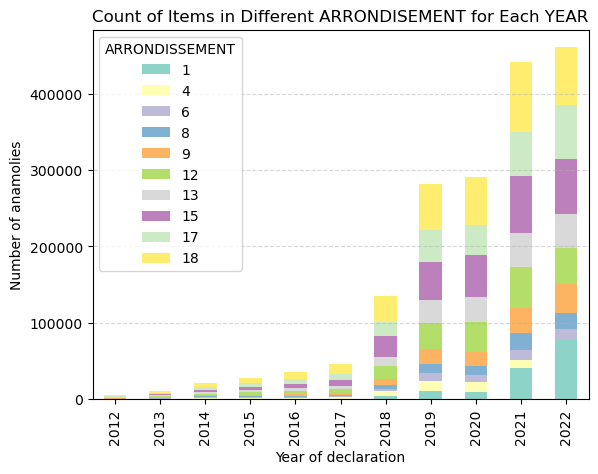

In [34]:
df_anomaly_counts = df.groupby(['ANNEEDECL', 'ARRONDISSEMENT']).size().reset_index(name='COUNT').pivot(index='ANNEEDECL', columns='ARRONDISSEMENT', values='COUNT')

plt.figure(figsize=(15, 6))
df_anomaly_counts.plot(kind='bar', stacked=True, cmap='Set3')
plt.title('Count of Items in Different ARRONDISEMENT for Each YEAR')
plt.xlabel('Year of declaration')
plt.ylabel('Number of anamolies')
plt.grid(True, axis='y', linestyle='--', alpha=0.5, zorder=0)
plt.show()


Let's check the expected value for year 2020. we can see taht it is bigger than shown originally.

/var/folders/l2/f21dn1wn2xbg6ynv8vsd0j580000gn/T/ipykernel_1484/2161012536.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anomaly_counts_model[arrondissement].fillna(df_anomaly_counts_model[arrondissement].mean(), inplace=True)


<Figure size 1500x600 with 0 Axes>

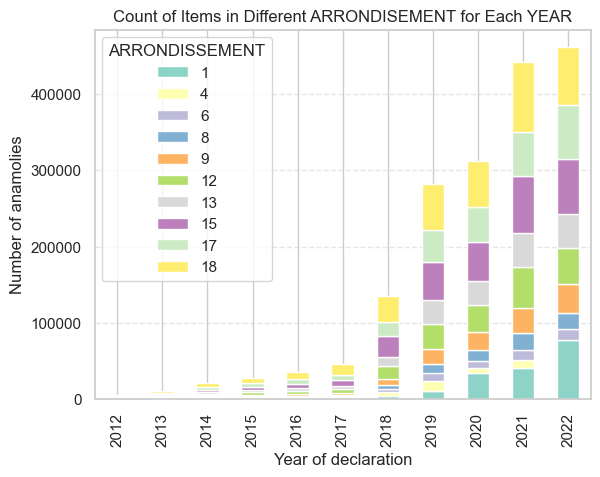

In [188]:
from sklearn.linear_model import LinearRegression

df_anomaly_counts = df.groupby(['ANNEEDECL', 'ARRONDISSEMENT']).size().reset_index(name='COUNT').pivot(index='ANNEEDECL', columns='ARRONDISSEMENT', values='COUNT').reset_index()
df_anomaly_counts_model = df_anomaly_counts[df_anomaly_counts['ANNEEDECL'] != 2020]
count_column_name = df_anomaly_counts_model.columns[2] 
years = df_anomaly_counts_model['ANNEEDECL'].values.reshape(-1, 1)
for arrondissement in df_anomaly_counts_model.columns[1:]:
    df_anomaly_counts_model[arrondissement].fillna(df_anomaly_counts_model[arrondissement].mean(), inplace=True)

predictions = pd.DataFrame(index=arrondissements, columns=['Prediction_2020'])

for arrondissement in arrondissements:
    counts = df_anomaly_counts_model[arrondissement].values.reshape(-1, 1)
    model = LinearRegression()
    
    model.fit(years, counts)

    prediction_2020 = model.predict([[2020]])
    predictions.loc[arrondissement, 'Prediction_2020'] = prediction_2020[0]

predictions['Prediction_2020'] = predictions['Prediction_2020'].apply(lambda x: float(x[0]))

df_anomaly_counts_pred = df_anomaly_counts.copy()
row_index_2020 = df_anomaly_counts_pred[df_anomaly_counts_pred['ANNEEDECL'] == 2020].index[0]
df_anomaly_counts_pred.iloc[row_index_2020, 1:] = predictions.T.apply(lambda x: x[0]).values.astype(float)
df_anomaly_counts_pred = df_anomaly_counts_pred.set_index('ANNEEDECL')

# display(df_anomaly_counts)
# display(df_anomaly_counts_pred)
plt.figure(figsize=(15, 6))
df_anomaly_counts_pred.plot(kind='bar', stacked=True, cmap='Set3')
plt.title('Expected Count of Items in Different ARRONDISEMENT for Each YEAR')
plt.xlabel('Year of declaration')
plt.ylabel('Number of anamolies')
plt.grid(True, axis='y', linestyle='--', alpha=0.5, zorder=0)
plt.show()

In [35]:
set(df['TYPE'])

{'Activités commerciales et professionnelles',
 'Arbres, végétaux et animaux',
 'Autos, motos, vélos... ',
 'Du vert près de chez moi',
 'Eau',
 'Graffitis, tags, affiches et autocollants',
 'Mobiliers urbains',
 'Objets abandonnés',
 'Problème sur un chantier',
 'Propreté',
 'Voirie et espace public',
 'Éclairage / Électricité'}

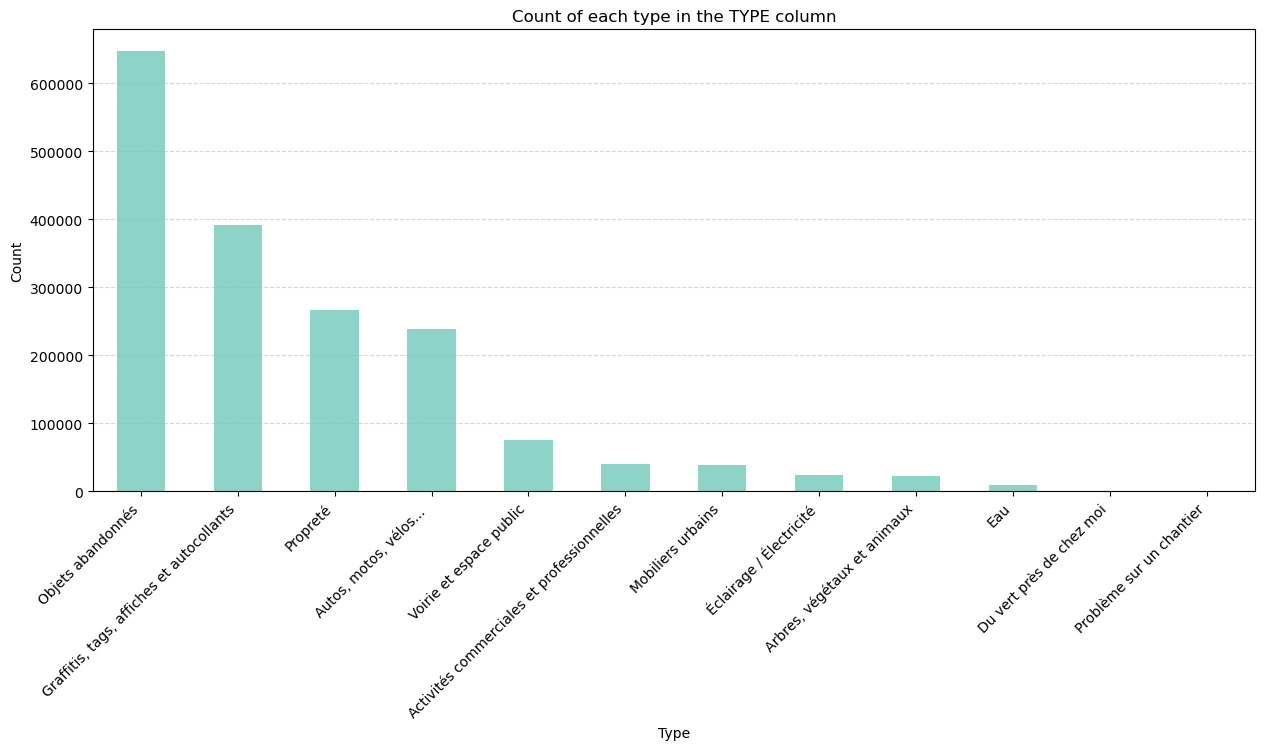

In [36]:
df_anomaly_counts = df['TYPE'].value_counts()

plt.figure(figsize=(15, 6))
df_anomaly_counts.plot(kind='bar', rot=45, cmap='Set3')
plt.title('Count of each type in the TYPE column')
plt.xlabel('Type')
plt.xticks(ha='right')
plt.ylabel('Count')
plt.grid(True, axis='y', linestyle='--', alpha=0.5, zorder=0)
plt.show()

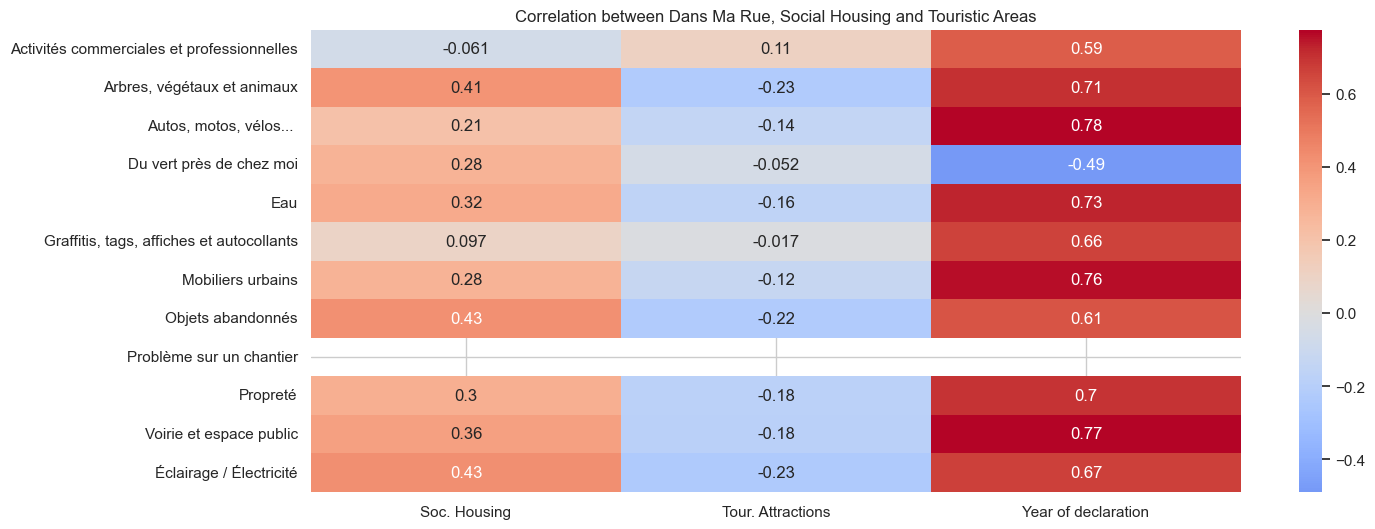

In [189]:
df_corr_type = df.groupby(['ARRONDISSEMENT', 'TYPE', 'ANNEEDECL'])['TYPE'].count().reset_index(name='NUMBER_OF_ATTRACTIONS').pivot(index=['ARRONDISSEMENT', 'ANNEEDECL'], columns='TYPE', values='NUMBER_OF_ATTRACTIONS').reset_index()
df_correlation = pd.merge(df_corr_type, df[['ARRONDISSEMENT', 'SOCIAL_HOUSING_AREA', 'NUMBER_OF_TOURISTIC_ATTRACTIONS']].drop_duplicates(subset='ARRONDISSEMENT'), on='ARRONDISSEMENT', how='left')
df_correlation = df_correlation.corr()

df_correlation = df_correlation.drop(['SOCIAL_HOUSING_AREA', 'NUMBER_OF_TOURISTIC_ATTRACTIONS', 'ARRONDISSEMENT', 'ANNEEDECL'])

plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(df_correlation[['SOCIAL_HOUSING_AREA', 'NUMBER_OF_TOURISTIC_ATTRACTIONS', 'ANNEEDECL']], annot=True, cmap='coolwarm', center=0)
new_labels = ['Soc. Housing', 'Tour. Attractions', 'Year of declaration']
heatmap.set_xticklabels(new_labels, rotation=0, ha='center')
plt.title('Correlation between Dans Ma Rue, Social Housing and Touristic Areas')
plt.show()

In [ ]:
df[df['TYPE'] == 'Problème sur un chantier']

,ID_DMR,TYPE,SOUSTYPE,ADRESSE,CODE_POSTAL,VILLE,ARRONDISSEMENT,DATEDECL,ANNEEDECL,MOISDECL,NUMERO,PREFIXE,INTERVENANT,CONSEILQUARTIER,LONGITUDE,LATITUDE,SOCIAL_HOUSING_AREA,NUMBER_OF_TOURISTIC_ATTRACTIONS
316405,S2016I002440,Problème sur un chantier,NaN,"28 rue mademoiselle, 75015 PARIS",75015,Paris 15,15,2016-09-09 0:00:00,2016,9,2440,S,NaN,SAINT - LAMBERT,2.296349,48.8437,6.698939e+06,1


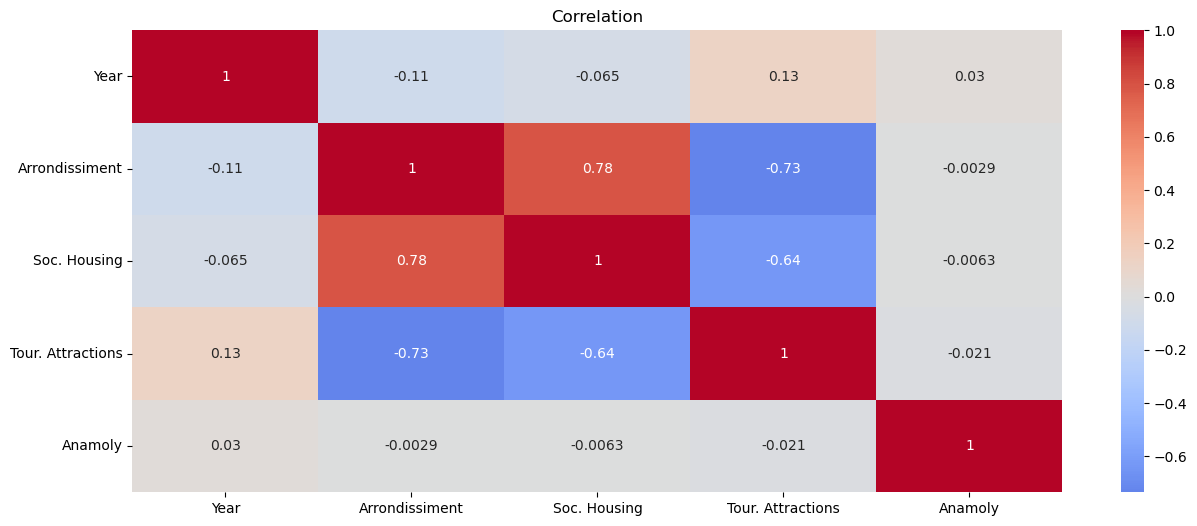

In [ ]:
types_list = list(df['TYPE'])
types_set = set(types_list)
for i in range(len(types_list)):
    for type_index, type_name in enumerate(types_set):
        if  types_list[i] == type_name:
            types_list[i] = type_index
            
# Columns to copy
columns_to_copy = ['ANNEEDECL', 'ARRONDISSEMENT', 'SOCIAL_HOUSING_AREA', 'NUMBER_OF_TOURISTIC_ATTRACTIONS']

# Create df_copy
df_copy = df[columns_to_copy].copy()

# Add TYPE_INDEX column
df_copy['TYPE_INDEX'] = types_list



df_correlation = df_copy.corr()

plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(df_correlation, annot=True, cmap='coolwarm', center=0)
new_labels = ['Year', 'Arrondissiment', 'Soc. Housing', 'Tour. Attractions', 'Anamoly']
heatmap.set_yticklabels(new_labels, rotation=0, ha='right')
heatmap.set_xticklabels(new_labels, rotation=0, ha='center')
plt.title('Correlation')
plt.show()

## Model